<a href="https://colab.research.google.com/github/bpratik01/ML-projects/blob/main/Pipeline_Wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wine Quality Prediction with Decision Tree Classifier**

## **Project Overview**
This project focuses on building a wine quality prediction model using the scikit-learn's in-built wine dataset. The goal is to create a model that can accurately predict the quality of wines based on various attributes. To achieve this, we employ several data preprocessing techniques and machine learning tools, such as ColumnTransformer, Pipeline, and the Decision Tree Classifier algorithm.

## **Tools and Techniques**
1. **Data Preprocessing**:-
To prepare the data for modeling, we use ColumnTransformer to apply different preprocessing steps to various subsets of the dataset. These preprocessing steps include:

*MinMax Scaling*: Scaling features to the same range using the MinMaxScaler.

*Feature Selection*: Selecting the most relevant features using SelectKBest with the chi-squared metric.
2. **Building a Pipeline**:-
A Pipeline is constructed to automate the process of transforming the data and training the machine learning model.

In [32]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [33]:
from sklearn.datasets import load_wine

In [34]:
dset = load_wine()

In [35]:
df = pd.DataFrame(data = dset.data, columns = dset.feature_names)

In [36]:
df.shape

(178, 13)

In [37]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [38]:
df['target'] = dset.target

In [39]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


<Axes: ylabel='target'>

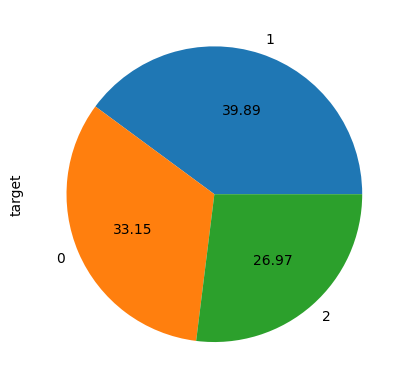

In [40]:
df['target'].value_counts().plot(kind ='pie', autopct = '%.2f')

In [41]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

# **Train_test_Split**

In [42]:
X = df.drop('target', axis= 1)
Y = df['target']

In [43]:
X.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


In [44]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, random_state =42)

In [45]:
enc = LabelEncoder()
enc.fit(y_train)


LabelEncoder()

In [46]:
y_train = enc.transform(y_train)
y_test =  enc.transform(y_test)

In [47]:
y_test

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(142, 13)
(36, 13)
(142,)
(36,)


# **Pipeline Implementation**

In [49]:
x_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0


In [50]:
df.shape

(178, 14)

In [51]:
trf1 = ColumnTransformer([
    ('alcohol_scaled', MinMaxScaler(), [0]),
    ('alcalinity_scaled', MinMaxScaler(), [3]),
    ('magnesium_scaled', MinMaxScaler(), [4]),
    ('clr_intensity_scaled', MinMaxScaler(), [9]),
    ('proline_scaled', MinMaxScaler(), [12])],
    remainder='passthrough'
)

trf2 = SelectKBest(score_func=chi2, k=12)

trf3 = DecisionTreeClassifier()

pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
])

pipe.fit(x_train, y_train)


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('alcohol_scaled',
                                                  MinMaxScaler(), [0]),
                                                 ('alcalinity_scaled',
                                                  MinMaxScaler(), [3]),
                                                 ('magnesium_scaled',
                                                  MinMaxScaler(), [4]),
                                                 ('clr_intensity_scaled',
                                                  MinMaxScaler(), [9]),
                                                 ('proline_scaled',
                                                  MinMaxScaler(), [12])])),
                ('trf2',
                 SelectKBest(k=12,
                             score_func=<function chi2 at 0x7a0e7e8a51b0>)),
                ('trf3', DecisionTreeClassifier())])

#**Exploring the Pipeline**

In [52]:
from sklearn import set_config
set_config(display = 'diagram')

In [53]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('alcohol_scaled', MinMaxScaler(), [0]),
                                 ('alcalinity_scaled', MinMaxScaler(), [3]),
                                 ('magnesium_scaled', MinMaxScaler(), [4]),
                                 ('clr_intensity_scaled', MinMaxScaler(), [9]),
                                 ('proline_scaled', MinMaxScaler(), [12])]),
 'trf2': SelectKBest(k=12, score_func=<function chi2 at 0x7a0e7e8a51b0>),
 'trf3': DecisionTreeClassifier()}

In [54]:
y_pred = pipe.predict(x_test)

In [57]:
print('The accuracy of the model is',(accuracy_score(y_test, y_pred)*100))

The accuracy of the model is 97.22222222222221


In [58]:
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

# **Cross Validation of Pipeline**

In [59]:
from sklearn.model_selection import cross_val_score

In [64]:
cross_val_score(pipe, x_train, y_train, cv =5, scoring = 'accuracy').mean()*100

92.24137931034484